In [20]:
import pandas as pd
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
import math
tqdm.pandas()

In [21]:
MIN_ALLOW_SPEED = 20
MAX_ALLOW_SPEED = 160

In [22]:
road = 1
direction = "out"

# USE DATA BEFORE LIMIT SPEED 80
df = pd.read_csv(
    f'../dataset/2020-02-road-{road}-{direction}.csv', parse_dates=["datetime"])


In [23]:
data=[]
df_km = df.groupby(['km'])
km_list = list(df_km.groups.keys())


In [24]:
df

,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime
0,2020-02-01 00:00:34,1,25,out,1,0,0,1,43,43,0,0
1,2020-02-01 00:00:34,1,26,out,1,0,0,1,71,71,0,0
2,2020-02-01 00:00:34,1,27,out,1,0,0,1,0,0,0,0
3,2020-02-01 00:00:34,1,28,out,2,1,2,1,41,48,0,0
4,2020-02-01 00:00:34,1,29,out,3,3,4,0,75,108,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23500044,2020-02-29 23:59:14,1,925,out,0,0,1,0,0,0,0,0
23500045,2020-02-29 23:59:14,1,926,out,1,1,0,0,51,51,60,60
23500046,2020-02-29 23:59:14,1,939,out,1,0,0,1,57,57,0,0
23500047,2020-02-29 23:59:14,1,953,out,0,0,1,0,0,0,0,0


In [25]:
df.max()

datetime          2020-02-29 23:59:14
road_number                         1
km                                993
direction                         out
all_units                         116
inflow_units                       46
outflow_unit                       44
samecell_units                     93
avg_speed                         222
max_speed                         240
avg_traveltime                    996
max_traveltime                    999
dtype: object

In [26]:
df_km

In [27]:

for km in km_list:
    km_group = df_km.get_group(km)
    df_maxspeed_eachday = km_group.groupby([km_group['datetime'].dt.date])['avg_speed'].max()
    maxspeed = df_maxspeed_eachday.max()
    data.append([road,direction,km,df_maxspeed_eachday.max()])

new_df = pd.DataFrame(data,columns=['road','direction','km','mffs'])

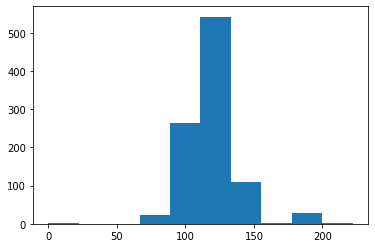

In [28]:
plt.hist(new_df['mffs'])
plt.show()

In [29]:
new_df.loc[new_df['mffs'] >= MAX_ALLOW_SPEED]

,road,direction,km,mffs
104,1,out,128,182
381,1,out,405,180
501,1,out,525,222
635,1,out,659,180
638,1,out,662,180
639,1,out,663,180
645,1,out,669,180
651,1,out,675,180
654,1,out,678,180
655,1,out,679,180


In [30]:
new_df.loc[new_df['mffs'] > MAX_ALLOW_SPEED,'mffs'] = MAX_ALLOW_SPEED
new_df.loc[new_df['mffs'] >= MAX_ALLOW_SPEED]

,road,direction,km,mffs
104,1,out,128,160
381,1,out,405,160
501,1,out,525,160
635,1,out,659,160
638,1,out,662,160
639,1,out,663,160
645,1,out,669,160
651,1,out,675,160
654,1,out,678,160
655,1,out,679,160


In [31]:
new_df.loc[new_df['mffs'] <= MIN_ALLOW_SPEED]

,road,direction,km,mffs
0,1,out,19,0
622,1,out,646,0


In [32]:
new_df.loc[new_df['mffs'] < MIN_ALLOW_SPEED,'mffs'] = MIN_ALLOW_SPEED
new_df.loc[new_df['mffs'] >= MIN_ALLOW_SPEED]

,road,direction,km,mffs
0,1,out,19,20
1,1,out,25,134
2,1,out,26,130
3,1,out,27,141
4,1,out,28,144
...,...,...,...,...
965,1,out,989,109
966,1,out,990,121
967,1,out,991,97
968,1,out,992,85


In [33]:
new_df

,road,direction,km,mffs
0,1,out,19,20
1,1,out,25,134
2,1,out,26,130
3,1,out,27,141
4,1,out,28,144
...,...,...,...,...
965,1,out,989,109
966,1,out,990,121
967,1,out,991,97
968,1,out,992,85


In [34]:
# new_df['mffs'].max()

In [35]:
# new_df['mffs'].min()

In [36]:
# new_df['mffs'].unique()

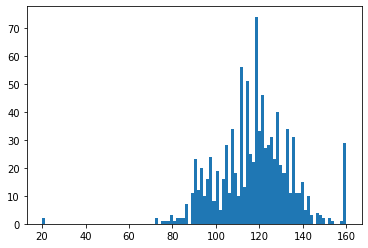

In [37]:
plt.hist(new_df['mffs'],bins=100)
plt.show()

In [38]:
new_df.to_csv('../dataset/road'+str(road)+'-'+direction+'-mffs.csv',index=False)
print('saved road '+str(road)+' : ' + direction)

saved road 1 : out
